# Car Price Prediction with Machine Learning

# Project Type - Price Prediction
# Contribution - Four Member
# Member Name - MD SHAHBAZ SHAMIM, DANIYA KULSUM, ALISHA KAZMI, ASHISH KUMAR 

# Introduction:

# Imagine having the power to predict the price of a Car with remarkable accuracy, using its make, model, year, mileage, and more. Thanks to machine learning, it’s possible! In this article, we’ll guide you through creating a model that predicts car prices based on key features. By analyzing data, machine learning algorithms learn patterns and relationships, enabling them to make accurate predictions. This model can be incredibly useful for car buyers and sellers, helping them make informed decisions. With machine learning, predicting vehicle prices becomes not just a possibility, but a reality that can simplify car transactions for everyone involved.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xg


In [68]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

# This dataset contains information about different cars, like their names, manufacturing years, selling prices, and more. For each car, we know how much it sold for, how old it is, how many kilometers it’s been driven, and what type of fuel it uses. We also see if it was sold by a dealer or an individual, the transmission type (manual or automatic), and how many previous owners it had. With this data, we can study car pricing trends and build tools to help people estimate how much a car might cost based on these factors.

In [70]:
dataset = pd.read_csv("car_price.csv")

In [72]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Initial Exploration And Data Cleaning

In [75]:
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 1- Range of Years

Range of years: 2003 to 2018


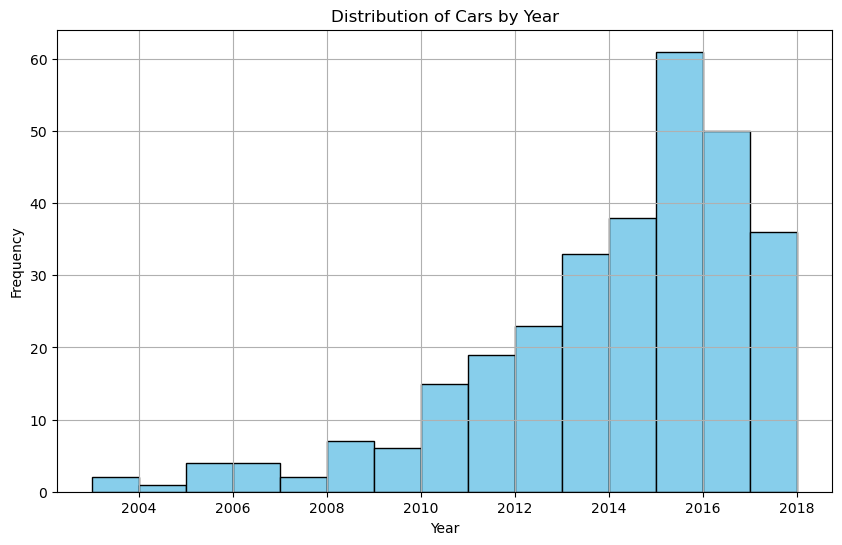

In [78]:
min_year = dataset['Year'].min()
max_year = dataset['Year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(dataset['Year'], bins=range(dataset['Year'].min(), dataset['Year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2- Max vs. Min Selling Prices

Maximum selling price: 35.0
Minimum selling price: 0.1
Car with Maximum Selling Price of  land cruiser  is in 35.0
Car with Minimum Selling Priceof  Bajaj Pulsar 150  is in 0.1


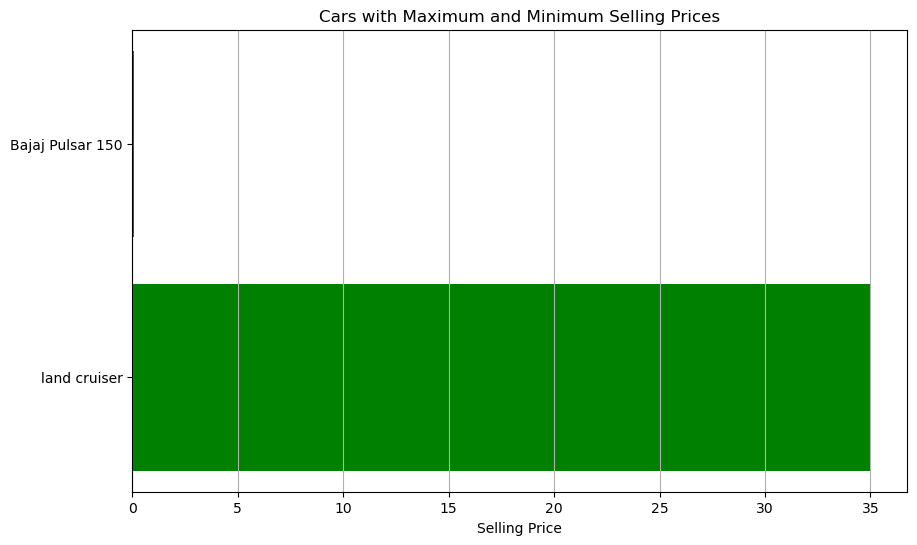

In [81]:
max_selling_car = dataset.loc[dataset['Selling_Price'].idxmax(), 'Car_Name']
min_selling_car = dataset.loc[dataset['Selling_Price'].idxmin(), 'Car_Name']
max_selling_price = dataset['Selling_Price'].max()
min_selling_price = dataset['Selling_Price'].min()
print("Maximum selling price:", max_selling_price)
print("Minimum selling price:", min_selling_price)
print("Car with Maximum Selling Price of ", max_selling_car," is in",max_selling_price)
print("Car with Minimum Selling Priceof ", min_selling_car," is in",min_selling_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh([max_selling_car, min_selling_car], [dataset['Selling_Price'].max(), dataset['Selling_Price'].min()], color=['green', 'red'])
plt.xlabel('Selling Price')
plt.title('Cars with Maximum and Minimum Selling Prices')
plt.grid(axis='x')
plt.show()

# 3- Fuel Type

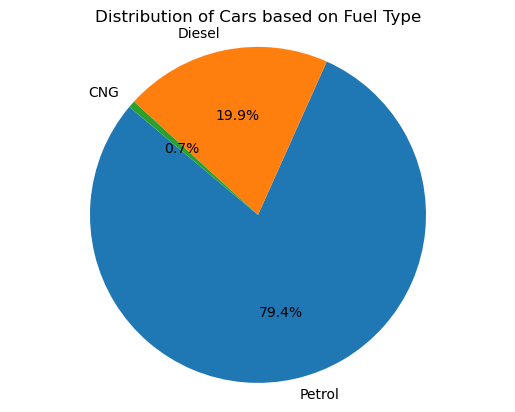

In [84]:
fuel_type_counts = dataset['Fuel_Type'].value_counts()

# Plotting
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cars based on Fuel Type')
plt.show()

# 4- Selling Type

In [33]:
from sklearn.linear_model import LogisticRegression
selling_type_counts = dataset['Selling_type'].value_counts()

# Plot the counts
plt.bar(selling_type_counts.index, selling_type_counts.values, color=['blue', 'brown'])
plt.title('Distribution of Selling Types')
plt.xlabel('Selling Type')
plt.ylabel('Number of Cars Sold')
plt.show()

NameError: name 'dataset' is not defined

# 5- Transmission Type

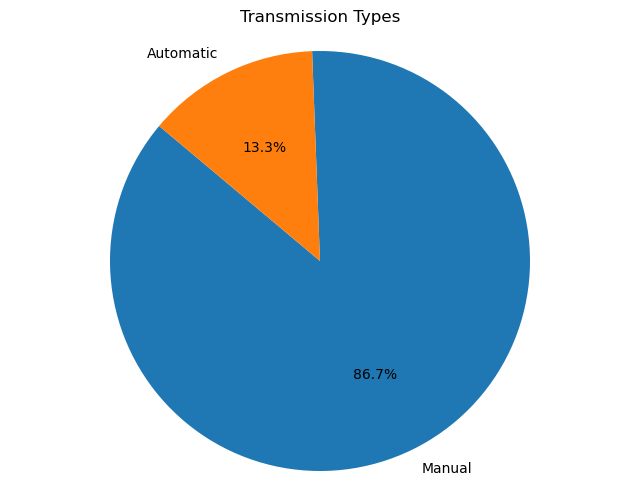

In [90]:
transmission_counts = dataset['Transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

# 6- Price Trends by Year

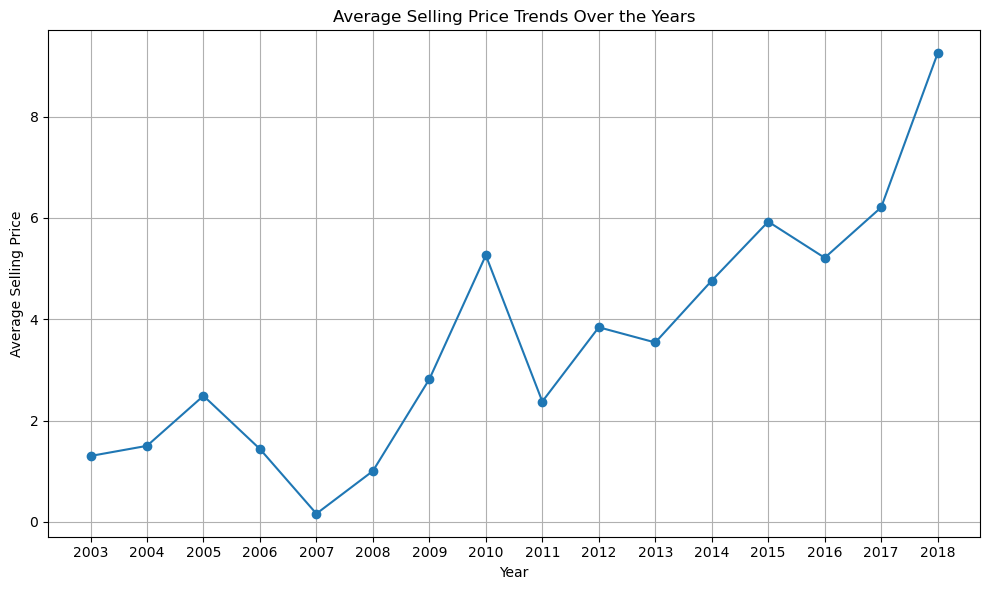

In [93]:
price_trends = dataset.groupby('Year')['Selling_Price'].mean().reset_index()

# Sorting the DataFrame by year
price_trends = price_trends.sort_values(by='Year')

# Plotting the price trends
plt.figure(figsize=(10, 6))
plt.plot(price_trends['Year'], price_trends['Selling_Price'], marker='o', linestyle='-')
plt.title('Average Selling Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(price_trends['Year'])
plt.tight_layout()
plt.show()

# 7- Relationship between Selling Price and Owner

Correlation between Selling Price and owner: -0.08834409908720235


<Figure size 1000x600 with 0 Axes>

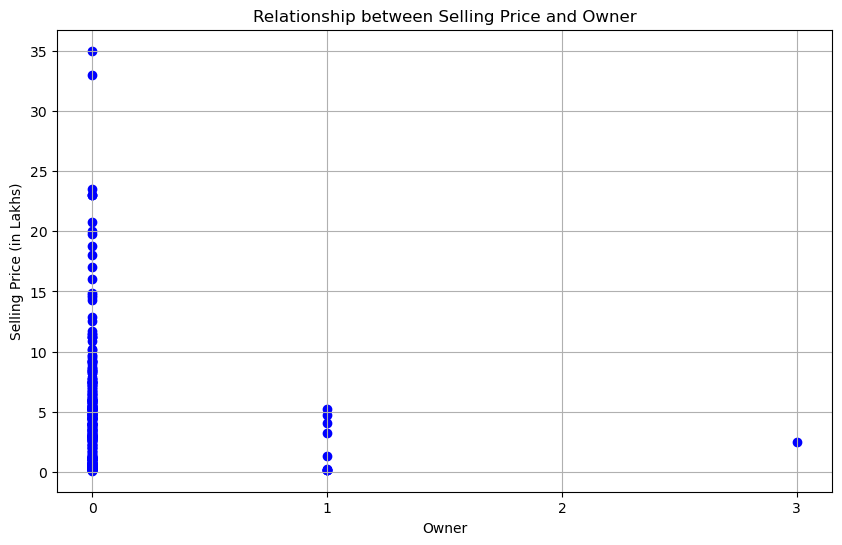

In [96]:
correlation = dataset['Selling_Price'].corr(dataset['Owner'])

print("Correlation between Selling Price and owner:", correlation)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Owner'], dataset['Selling_Price'], color='blue')
plt.title('Relationship between Selling Price and Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price (in Lakhs)')
plt.xticks(range(max(dataset['Owner']) + 1))
plt.grid(True)
plt.show()

# 8- Relationship between Selling Price and Driven_kms

In [19]:
correlation = dataset['Selling_Price'].corr(dataset['Driven_kms'])

print("Correlation between Selling Price and Driven Kilometers:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Driven_kms", y="Selling_Price", data=dataset, hue="Fuel_Type", style="Transmission", palette="viridis")
plt.title("Relationship between Selling Price and Mileage")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in Lakhs)")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()

NameError: name 'dataset' is not defined

# 9- Relationship between Selling Price and Years

Correlation between Selling Price and years: 0.23614098016042726


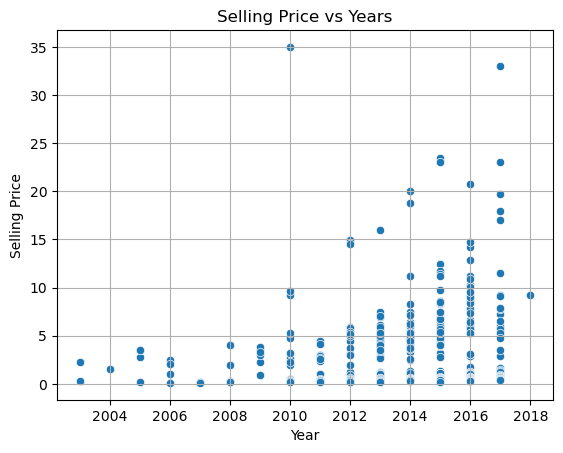

In [102]:
correlation = dataset['Selling_Price'].corr(dataset['Year'])

print("Correlation between Selling Price and years:", correlation)
sns.scatterplot(x="Year", y="Selling_Price", data=dataset, palette="viridis")
plt.title('Selling Price vs Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# 10- Top 10 Vehicle Brands Distribution

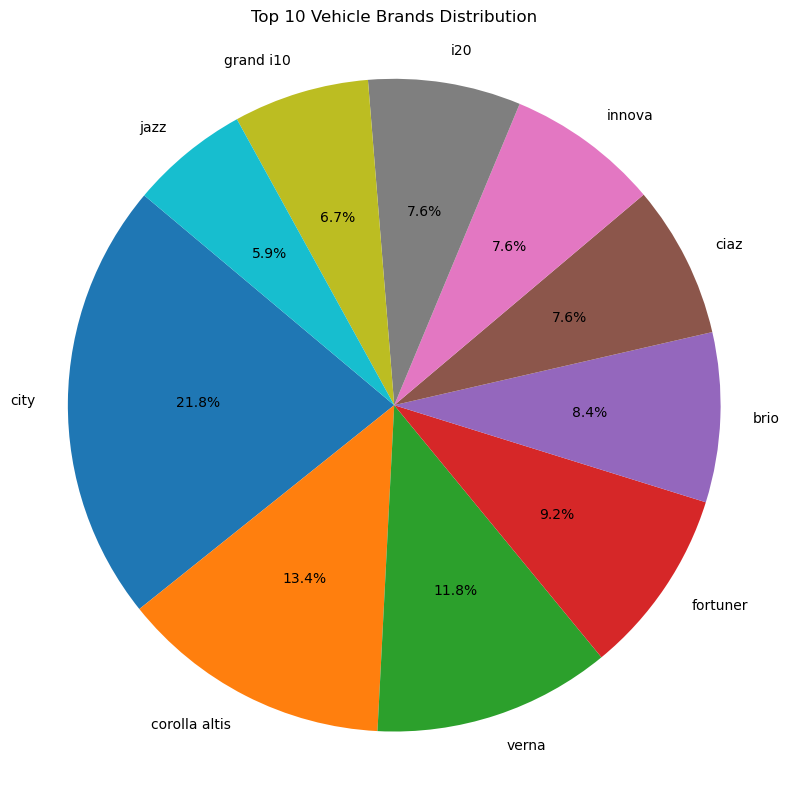

In [105]:
brand_distribution = dataset['Car_Name'].value_counts()

top_10_brands = brand_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

# for classification data we will use LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder
Car_Name_le = LabelEncoder()
dataset['Car_Name'] = Car_Name_le.fit_transform(dataset['Car_Name'])
Fuel_Type_le = LabelEncoder()
dataset['Fuel_Type'] = Fuel_Type_le.fit_transform(dataset['Fuel_Type'])
Selling_type_le = LabelEncoder()
dataset['Selling_type'] = Selling_type_le.fit_transform(dataset['Selling_type'])
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset['Transmission'])

##Split the data into X AND Y
input_data = dataset[["Car_Name","Year","Present_Price", "Driven_kms","Fuel_Type", "Selling_type", "Transmission", "Owner" ]]
output_data = dataset["Selling_Price"]

NameError: name 'dataset' is not defined

# After Label Encoding, all data is in numeric format. The next step is to standardize the numeric data to the same scale using StandardScaler for uniform comparison and improved model performance.

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data  = pd.DataFrame(ss.fit_transform(input_data),columns = input_data.columns)

input_data.head(2)

NameError: name 'input_data' is not defined

# Data Partitation
Splitting the data into 80% training and 20% testing

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data, output_data , test_size = 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

NameError: name 'input_data' is not defined

# Model 1- Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(x_train,y_train)*100)
print("R squared for test is :", lr.score(x_test,y_test)*100)

NameError: name 'x_train' is not defined

# Model 2- Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(x_train,y_train)*100)
print("R squared for test is :", rf.score(x_test,y_test)*100)

NameError: name 'x_train' is not defined

# Model 3- Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)

NameError: name 'x_train' is not defined

# Model 4- SVR

In [126]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)
train_rmse_svr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_svr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")
print("R squared for train is :",svr.score(x_train,y_train)*100)
print("R squared for test is :", svr.score(x_test,y_test)*100)

NameError: name 'x_train' is not defined

# Then in next Step we Compare the RMSE and R square and find the best model

In [23]:
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(x_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(x_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(x_test,y_test)*100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(x_test,y_test)*100)
}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

NameError: name 'test_rmse_dt' is not defined

# Type 1- Prediction with older data

In [25]:
new_data = {
    "Car_Name": "ritz",
    "Year": 2014,
    "Present_Price": 5.59,
    "Driven_kms": 27000,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}
new_data["Car_Name"] = Car_Name_le.transform([new_data["Car_Name"]])[0]
new_data["Fuel_Type"] = Fuel_Type_le.transform([new_data["Fuel_Type"]])[0]
new_data["Selling_type"] = Selling_type_le.transform([new_data["Selling_type"]])[0]
new_data["Transmission"] = Transmission_le.transform([new_data["Transmission"]])[0]
new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)

# Make predictions on the standardized new data using the trained Random Forest model
predicted_price = rf.predict(new_data_standardized)

# Print the predicted price
print("Predicted Selling Price:", predicted_price)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Type 2- Prediction with New data

In [135]:
new_data = {
   "Car_Name": "city",  # Example car name
    "Year": 2019,  # Example year
    "Present_Price": 10.0,  # Example present price
    "Driven_kms": 5000,  # Example driven kilometers
    "Fuel_Type": "Petrol",  # Example fuel type
    "Selling_type": "Dealer",  # Example selling type
    "Transmission": "Manual",  # Example transmission type
    "Owner": 0  # Example owner
}

new_data["Car_Name"] = Car_Name_le.transform([new_data["Car_Name"]])[0]
new_data["Fuel_Type"] = Fuel_Type_le.transform([new_data["Fuel_Type"]])[0]
new_data["Selling_type"] = Selling_type_le.transform([new_data["Selling_type"]])[0]
new_data["Transmission"] = Transmission_le.transform([new_data["Transmission"]])[0]
new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)
predicted_price = rf.predict(new_data_standardized)
print("Predicted Selling Price:", predicted_price)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Type 3- User Input Data Prediction

In [ ]:
car_name = input("Enter car name: ")
year = int(input("Enter year: "))
present_price = float(input("Enter present price: "))
driven_kms = float(input("Enter driven kilometers: "))
fuel_type = input("Enter fuel type (Petrol/Diesel/CNG): ")
selling_type = input("Enter selling type (Dealer/Individual): ")
transmission = input("Enter transmission type (Manual/Automatic): ")
owner = int(input("Enter number of previous owners: "))

# Encode categorical features
car_name_encoded = Car_Name_le.transform([car_name])[0]
fuel_type_encoded = Fuel_Type_le.transform([fuel_type])[0]
selling_type_encoded = Selling_type_le.transform([selling_type])[0]
transmission_encoded = Transmission_le.transform([transmission])[0]

# Create new data point
new_data_point = [[car_name_encoded, year, present_price, driven_kms, fuel_type_encoded, selling_type_encoded, transmission_encoded, owner]]

# Standardize the new data point
new_data_point_standardized = ss.transform(new_data_point)

# Make prediction
prediction = rf.predict(new_data_point_standardized)

print("Predicted Selling Price:", prediction)

Enter car name:  swift
Enter year:  2014
Enter present price:  8
Enter driven kilometers:  45000
Enter fuel type (Petrol/Diesel/CNG):  Petrol
Enter selling type (Dealer/Individual):  Dealer
Enter transmission type (Manual/Automatic):  Automatic


# CONCLUSION

# Understanding a dataset is crucial for building accurate prediction models. By exploring the data thoroughly, we uncover important insights that help us create effective models capable of revealing hidden patterns. From understanding the data to making predictions, the journey is full of excitement and learning. With the help of machine learning, we can harness the potential of our data to make informed decisions and drive innovation. This journey not only opens doors to new possibilities but also empowers us to navigate challenges and make impactful contributions to various fields.